# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):
- Isaia Pacheco
- Alex Garrigan-Timm
- Noam Joseph

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [468]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.<something> import <something>
from sklearn.model_selection import train_test_split

In [469]:
# Enforce Copy-on-Write (CoW) semantics here
pd.options.mode.copy_on_write = True
pd.set_option('display.max_rows', 100)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [470]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
def read_csv(file, **kwargs):
    cwd = Path.cwd()
    assignment2 = cwd.parent
    data = assignment2.joinpath('data')
    path = data.joinpath(file)
    if path.exists():
        print(f'Found the data file {path}')
    else:
        raise Exception('Could not find that file', path)
    return pd.read_csv(path, **kwargs)

#### mystery.csv appears to separate the columns with a pipe or "|"

In [471]:
mystery_df = read_csv('mystery.csv', delimiter='|', float_precision='round_trip')

Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025-Group/Assignments/Assignment4/data/mystery.csv


In [472]:
seed = 4
mystery_df_train, mystery_df_test = train_test_split(mystery_df[:], train_size=0.79, random_state=seed)
mystery_df_eval, mystery_df_test = train_test_split(mystery_df_test, test_size=0.5, random_state=seed)
print(f'train: {mystery_df_train.shape}, test:{mystery_df_test.shape}, eval:{mystery_df_eval.shape}')

train: (1464, 8), test:(195, 8), eval:(195, 8)


In [473]:
mystery_df_train.value_counts().reset_index()

,x,y,z,d1,d2,d3,d4,c,count
0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,3.0,1
1,57.645690,40.666425,39.487514,252.860382,16.848943,36.991157,8515.151104,2.0,1
2,57.526759,87.863935,39.621245,91.797096,16.472094,36.997968,57655.404332,5.0,1
3,57.520259,40.567136,40.020137,252.965455,16.451539,36.998341,8421.917697,9.0,1
4,57.476891,76.604732,41.151655,131.304599,16.314502,37.000837,42538.056844,1.0,1
...,...,...,...,...,...,...,...,...,...
1459,42.090127,41.429903,39.840511,155.728617,-20.434489,38.115168,10546.293426,4.0,1
1460,42.053730,37.113471,35.483584,165.825536,-20.493351,38.118069,8131.417666,6.0,1
1461,42.014130,100.578936,40.569405,-45.112785,-20.557241,38.121225,78531.527478,2.0,1
1462,41.948283,65.540637,41.441127,74.487491,-20.663130,38.126473,31319.132523,11.0,1


In [474]:
before_describe = mystery_df_train.describe()

What does -999.0 mean? missing at random since all columns have -999?

In [475]:
df = mystery_df_train[
        (mystery_df_train['x'] > -999.0) |
        (mystery_df_train['y'] > -999.0) |
        (mystery_df_train['z'] > -999.0) |
        (mystery_df_train['d1'] > -999.0) |
        (mystery_df_train['d2'] > -999.0) |
        (mystery_df_train['d3'] > -999.0) |
        (mystery_df_train['d4'] > -999.0)
]

In [476]:
df.shape

(1457, 8)

In [477]:
after_describe = df.describe()

In [478]:
before_melted = before_describe.melt(ignore_index=False, var_name='Variable', value_name='df1_Value').reset_index().rename(columns={'index': 'Statistic'})
after_melted = after_describe.melt(ignore_index=False, var_name='Variable', value_name='df2_Value').reset_index().rename(columns={'index': 'Statistic'})
comparison_df = pd.merge(before_melted, after_melted, on=['Statistic', 'Variable'], how='outer')

In [479]:
comparison_df

,Statistic,Variable,df1_Value,df2_Value
0,25%,c,3.000000,3.000000
1,25%,d1,28.067353,29.121095
2,25%,d2,-27.777681,-27.583094
3,25%,d3,36.853594,36.857830
4,25%,d4,3963.250178,4052.592917
5,25%,x,36.526797,36.639848
6,25%,y,32.080622,32.299500
7,25%,z,37.916266,37.963049
8,50%,c,6.000000,6.000000
9,50%,d1,142.894013,143.514444


statistic relative the same, so treat as nan?

In [480]:
mystery_df = read_csv('mystery.csv', delimiter='|', float_precision='round_trip', na_values=[-999.0])
mystery_df_train, mystery_df_test = train_test_split(mystery_df[:], train_size=0.79, random_state=seed)
mystery_df_eval, mystery_df_test = train_test_split(mystery_df_test, test_size=0.5, random_state=seed)
print(f'train: {mystery_df_train.shape}, test:{mystery_df_test.shape}, eval:{mystery_df_eval.shape}')

Found the data file /Users/Isaia/PycharmProjects/CS-577-07-Data-Science-Fall-2025-Group/Assignments/Assignment4/data/mystery.csv
train: (1464, 8), test:(195, 8), eval:(195, 8)


<Axes: xlabel='c', ylabel='count'>

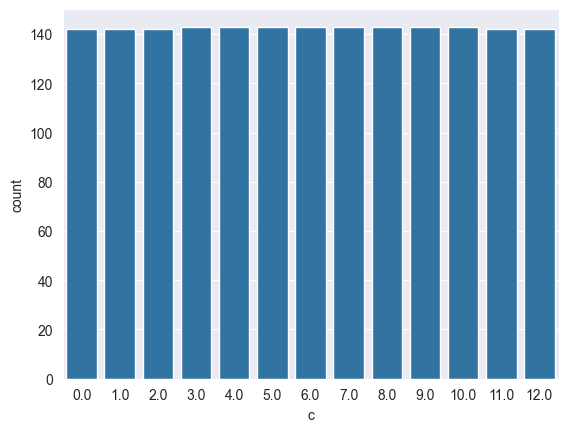

In [487]:
sns.barplot(mystery_df['c'].value_counts().reset_index(), x= 'c', y= 'count')

In [ ]:
sns.scatterplot()

#### Observations on the values in each column
- x
    - all decimals
    - most positive
    - few negative
        - fixed at -999.0
        - Possible NaN?
        - Possible abnormality?
    - might be related to d2 and d3 and c
                -  when d2, d3, c, are kept constant, x is also constant
- y
    - all decimals
    - 0-13
    - few negative
        - fixed at -999.0
        - Possible NaN?
        - Possible abnormality?
- z
    - all decimals
    - most positive
    - few negative
        - fixed at -999.0
        - Possible NaN?
        - Possible abnormality?

- c
    - all decimals
    - most positive
    - no negative
    - Range 0-12 inclusive
        - except 2
        - Possible categorical column?
    - uniformly distributed
        -  unless 2 is considered